In [1]:
from IPython.display import display
import ipywidgets
import traitlets
from jetbot import bgr8_to_jpeg
# from jetbot.camera.zmq_camera import ZmqCamera as Camera
from jetbot import Camera

camera = Camera()

image_widget = ipywidgets.Image()

traitlets.dlink((camera, 'value'), (image_widget, 'value'), transform=bgr8_to_jpeg)

display(image_widget)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

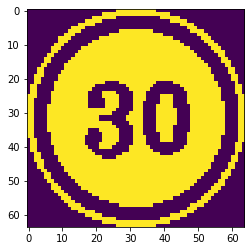

In [2]:
import cv2
from matplotlib import pyplot as plt

speed_limit_30_km = cv2.imread(r"signs/30_limit.png")
speed_limit_30_km = cv2.resize(speed_limit_30_km, (64, 64))
speed_limit_30_km = cv2.inRange(speed_limit_30_km, (89,91,149), (255,255,255))
plt.imshow( speed_limit_30_km)
plt.show()


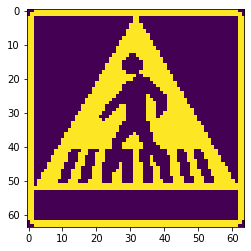

In [3]:
import cv2
from matplotlib import pyplot as plt


pedestrian = cv2.imread(r"signs/pedestrian.png")
pedestrian = cv2.resize(pedestrian, (64,64))
pedestrian = cv2.inRange(pedestrian, (89,91,149), (255,255,255))
plt.imshow( pedestrian)
plt.show()

In [36]:
import time 

def detect_signs():
    now = time.time()
    future = now + 5
    
    while True:
        frame = camera.value
        frameCopy=frame.copy()

        hsv=cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        hsv=cv2.blur(hsv,(5,5))
        mask = cv2.inRange(hsv, (65,98,141), (255, 255, 255)) #(18,91,6) für nacht (65,98,141) für tag
        
        mask = cv2.erode(mask, None, iterations=2)
        mask = cv2.dilate(mask, None, iterations=4)

        contours=cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        contours=contours[0]
        if contours:
            contours=sorted(contours, key=cv2.contourArea, reverse=True)
            cv2.drawContours(frame, contours, 0, (255,0,255), 3)

            (x,y,w,h)=cv2.boundingRect(contours[0])
            cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)

            roImg=frameCopy[y:y+h, x:x+w]
            roImg = cv2.resize((roImg), (64, 64))
            roImg=cv2.resize(roImg, (64,64))
            roImg=cv2.inRange(roImg, (40, 50, 100), (255,255,255)) #(89,91,149) # 40, 50, 100

            val1 = 0
            val2 = 0
            for i in range(64):
                for j in range(64):
                    if roImg[i][j] == speed_limit_30_km[i][j]:
                        val1+=1
                    if roImg[i][j] == pedestrian[i][j]:
                        val2+=1   
                        
            if val1 > 2750:
                # print(val1, val2)
                print("Speed limit 30km/h")
                break
            
            if val2 > 2650:
                # print(val1, val2)
                print("Pedestrian")
                break

        if cv2.waitKey(1) == 27:
            break

In [42]:
detect_signs()

Speed limit 30km/h
